In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/cog_course/cognizant/task_1/sample_sales_data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0        0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905
std,2260.181962,5.388088,1.122722,17.446680
min,0.000000,0.190000,1.000000,0.190000
25%,1957.000000,3.990000,1.000000,6.570000
50%,3914.000000,7.190000,3.000000,14.970000
75%,5871.000000,11.190000,4.000000,28.470000
max,7828.000000,23.990000,4.000000,95.960000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

Unnamed: 0        7829
transaction_id    7829
timestamp         7738
product_id         300
category            22
customer_type        5
unit_price          64
quantity             4
total              256
payment_type         4
dtype: int64

In [ ]:
df.payment_type.value_counts()

payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: count, dtype: int64

In [ ]:
df.category.value_counts()

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64

In [ ]:
df.customer_type.value_counts()

customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: count, dtype: int64

In [ ]:
df.payment_type.value_counts()

payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: count, dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(7829, 10)

In [ ]:
df.quantity.value_counts()

quantity
1    1979
4    1976
3    1954
2    1920
Name: count, dtype: int64

**Visualization**

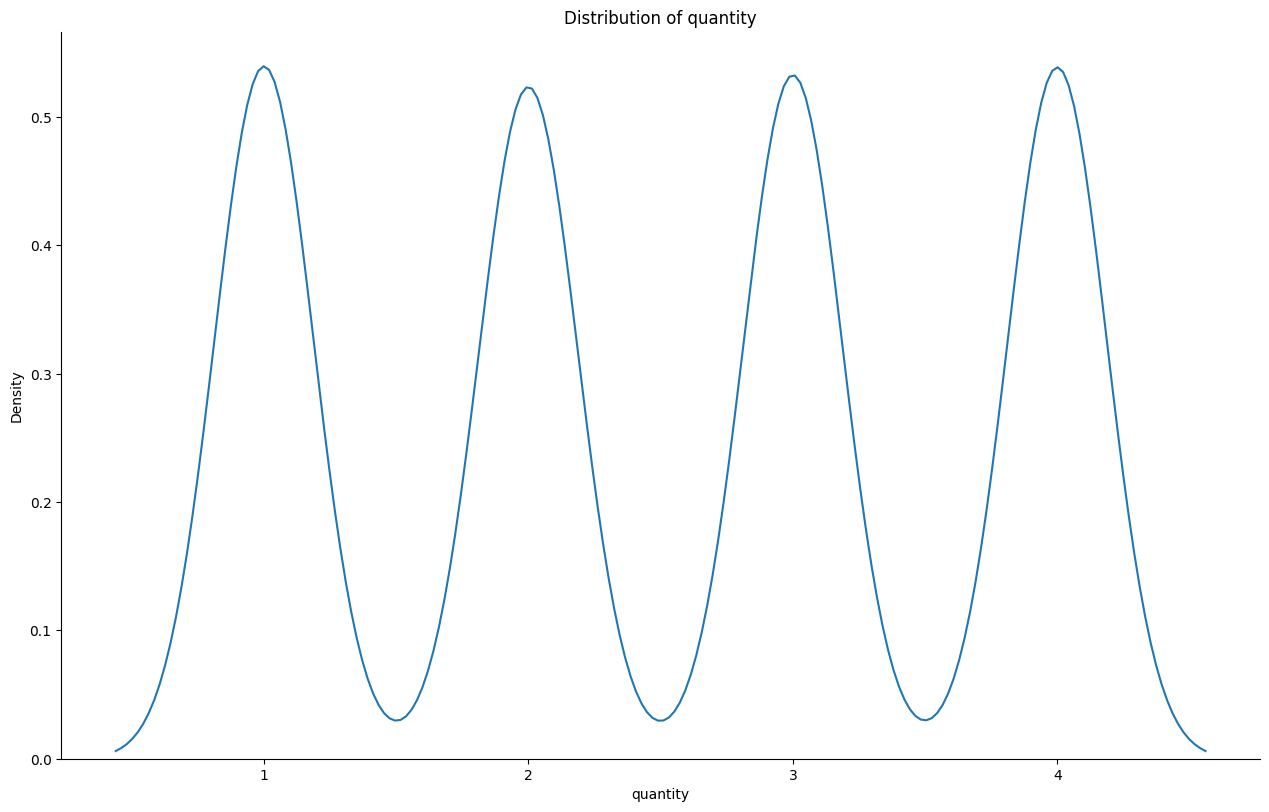

In [ ]:
sns.displot(df, x='quantity', kind = "kde", height= 8, aspect=8/5).set(title=f'Distribution of quantity')

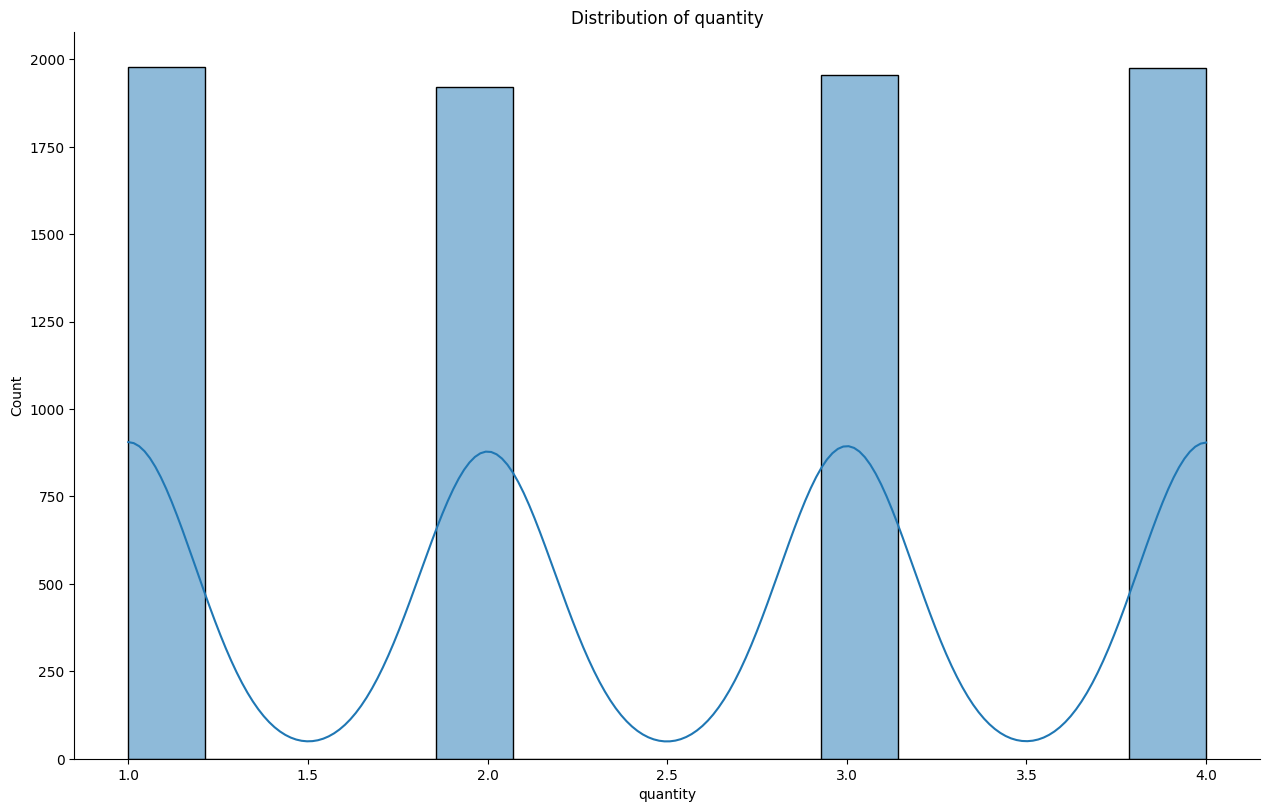

In [ ]:
def plot_continuous_distribution(df: pd.DataFrame = None, quantity: str = None, height: int = 8):
  _ = sns.displot(df, x= "quantity", kde=True, height=height, aspect=height/5).set(title=f'Distribution of quantity')
  return
plot_continuous_distribution(df, "quantitiy")

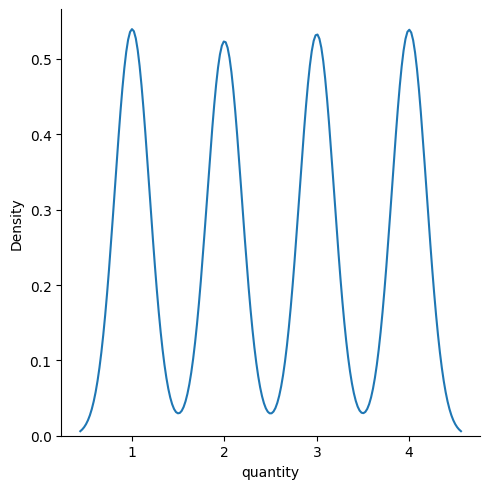

In [ ]:
sns.displot(df, x="quantity", kind="kde")

In [ ]:
def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)
  return
get_unique_values(df, "quantity")

Column: quantity has 4 unique values

quantity
1    1979
4    1976
3    1954
2    1920
Name: count, dtype: int64


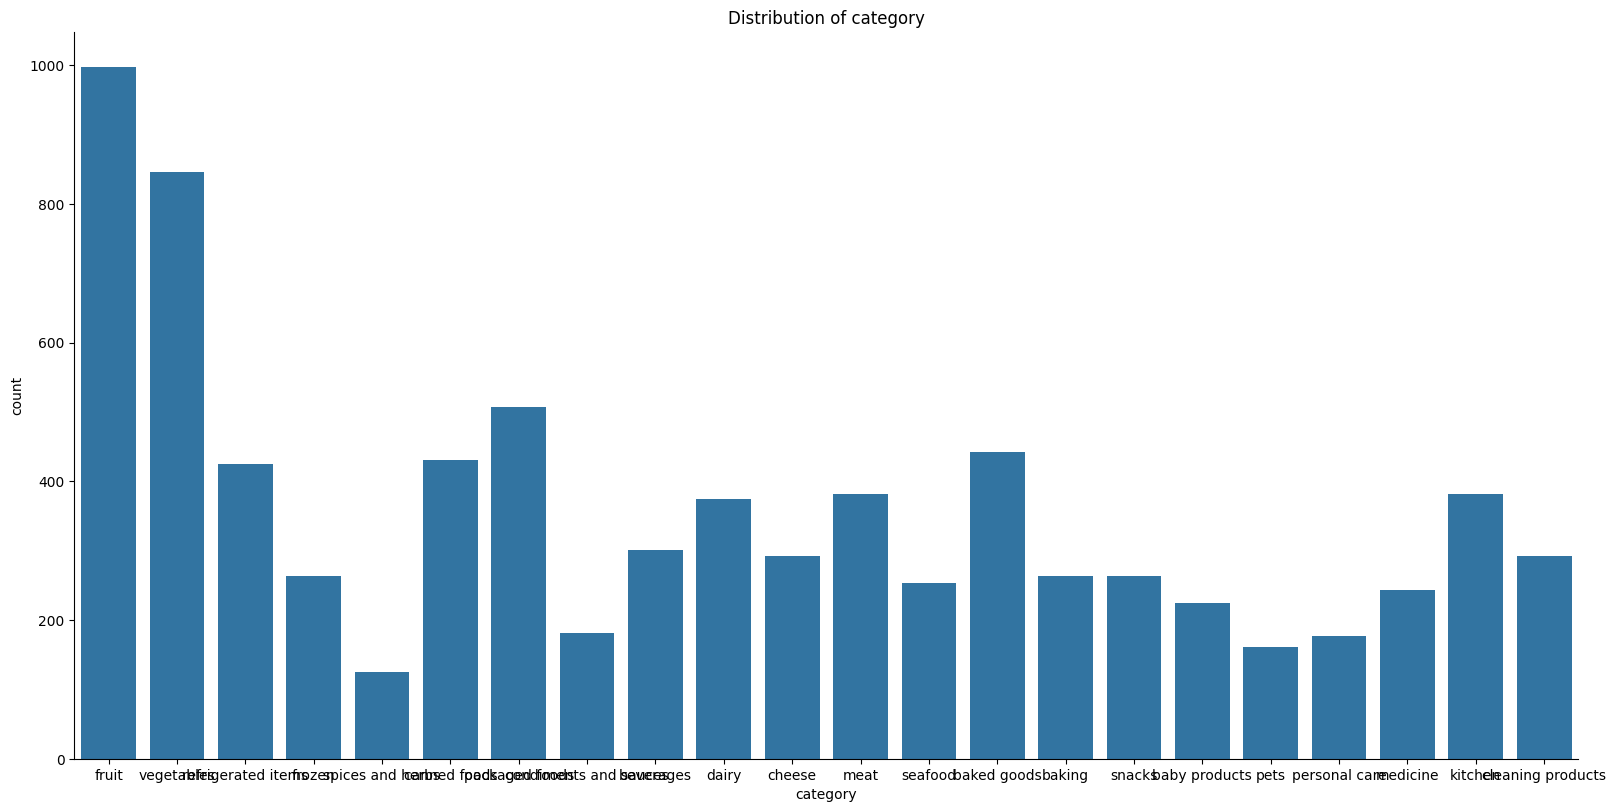

In [ ]:
def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');
  return
plot_categorical_distribution(df, "category", 8, 2)

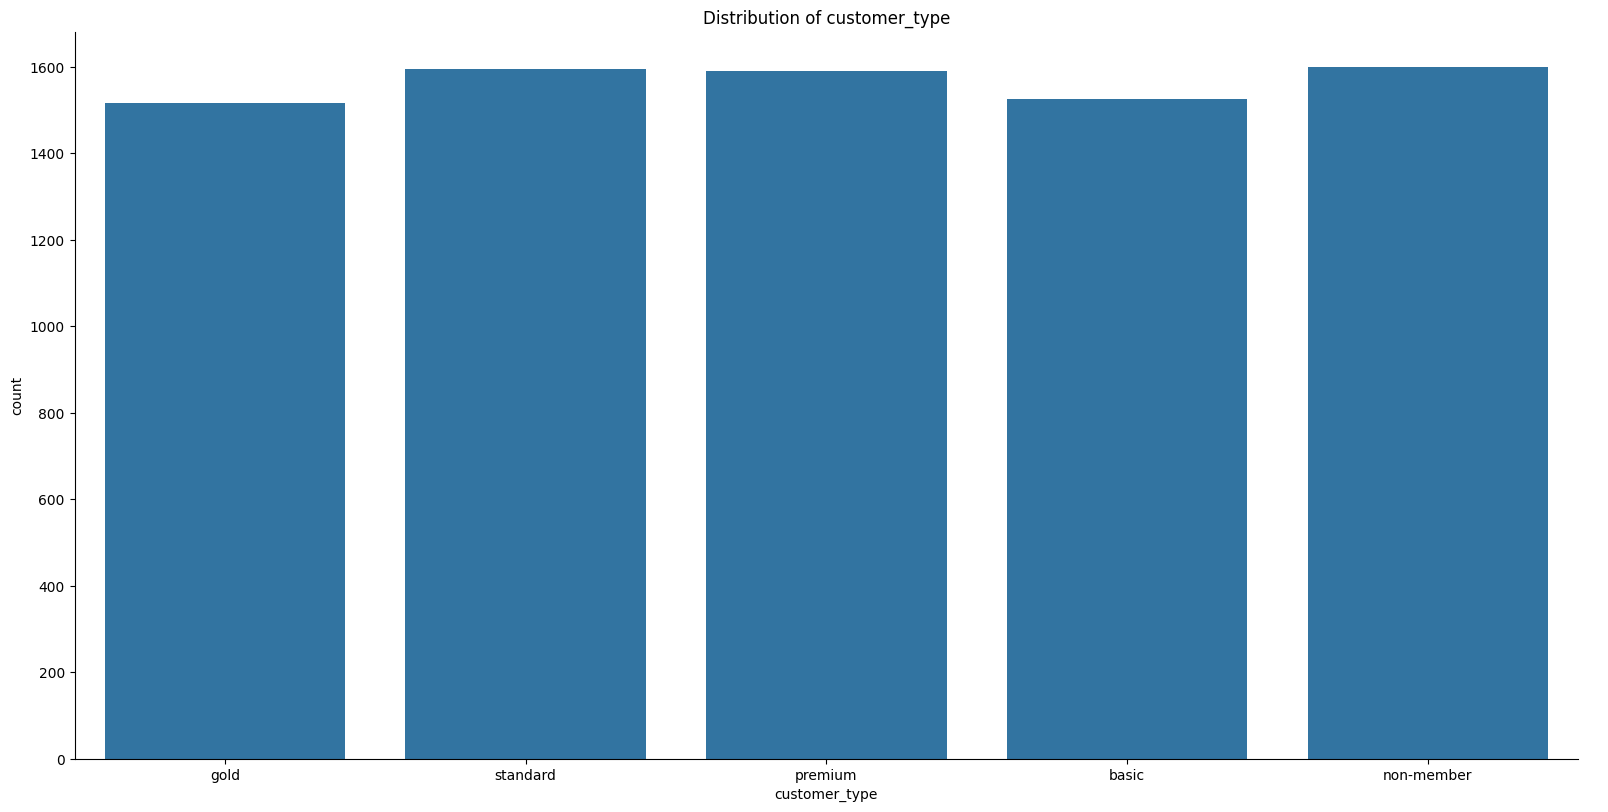

In [ ]:
def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');
  return
plot_categorical_distribution(df, "customer_type", 8, 2)

In [ ]:
def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')
  return
correlation_plot(df, "quantity")

TypeError: correlation_plot() takes from 0 to 1 positional arguments but 2 were given